In [1]:
import sys
import os
from dotenv import load_dotenv
load_dotenv()
sys.path.append(os.getenv("PATH_CUSUM"))

from source.generator.change_point_generator import ChangePointGenerator

# Create two data streams

In [66]:
# Data Stream 1 - Sudden Shift
generator1 = ChangePointGenerator(num_segments=3, 
                                 segment_length=1000, 
                                 change_point_type='sudden_shift', 
                                 seed=2)
generator1.generate_data()
data_stream1 = generator1.get_data()

# Data Stream 2 - Sudden Shift
generator2 = ChangePointGenerator(num_segments=6,
                                 segment_length=500, 
                                 change_point_type='sudden_shift', 
                                 seed=42)
generator2.generate_data()
data_stream2 = generator2.get_data()

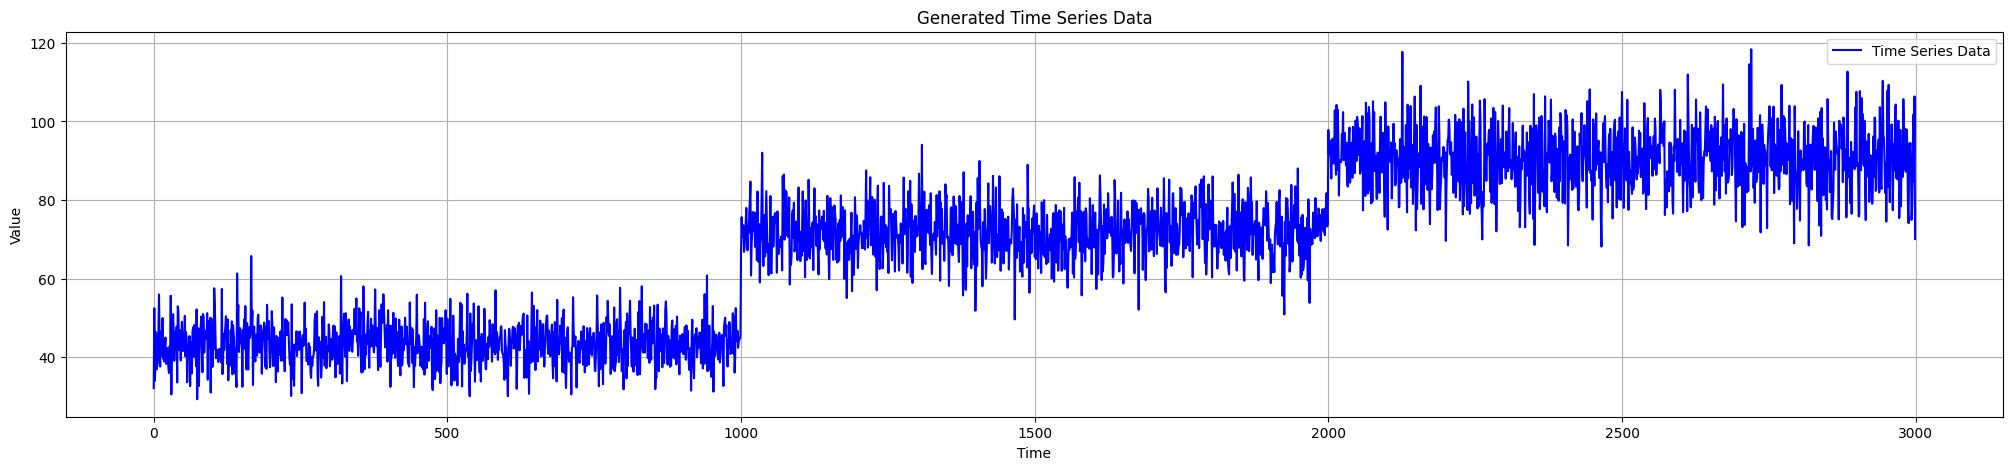

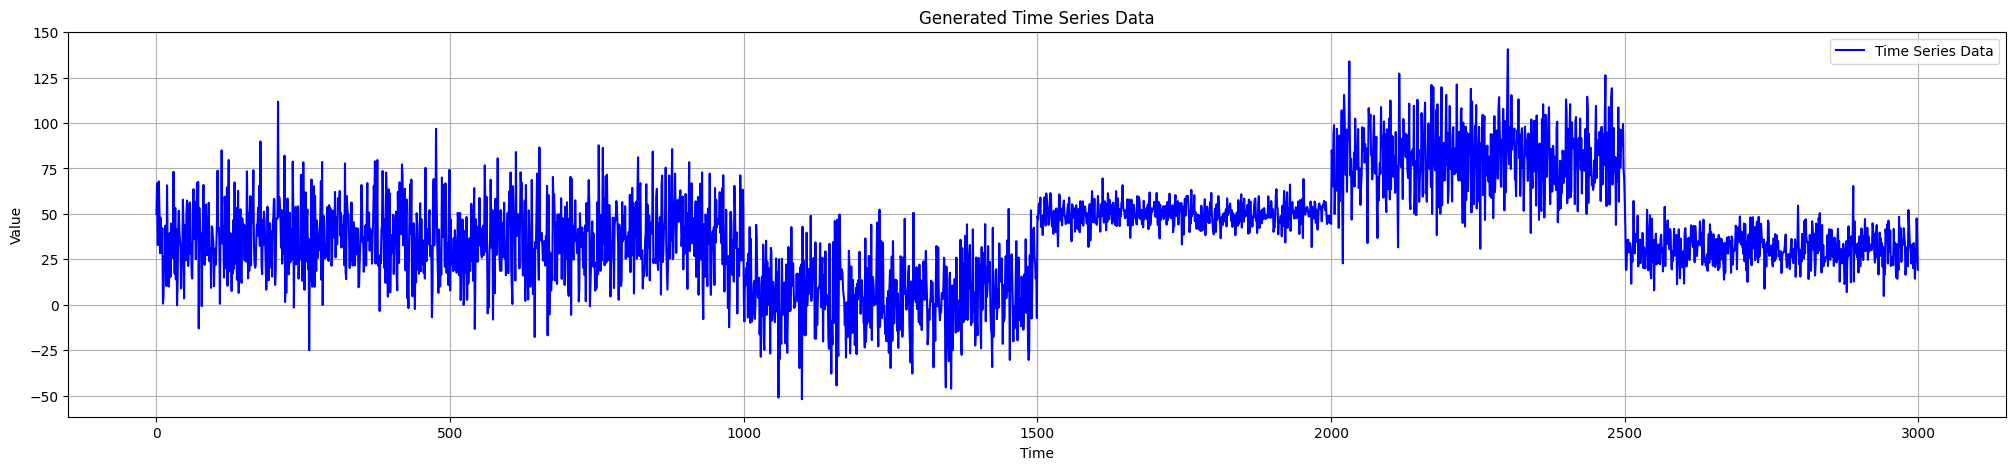

In [67]:
generator1.plot_data()

generator2.plot_data()

In [73]:
from source.detector.model import CusumModel

cusum = CusumModel(detector_name='cusum',
                  warmup_period=250, 
                  delta=1, 
                  threshold=4)

data_streams_results = cusum.offline_detection([data_stream1, data_stream2])

In [ ]:
list_drifts1 = [0 for _ in range(len(data_stream2))] 
for drift in data_streams_results[0][2]:
    list_drifts1[drift] = 1

list_drifts2 = [0 for _ in range(len(data_stream2))] 
for drift in data_streams_results[1][2]:
    list_drifts2[drift] = 1

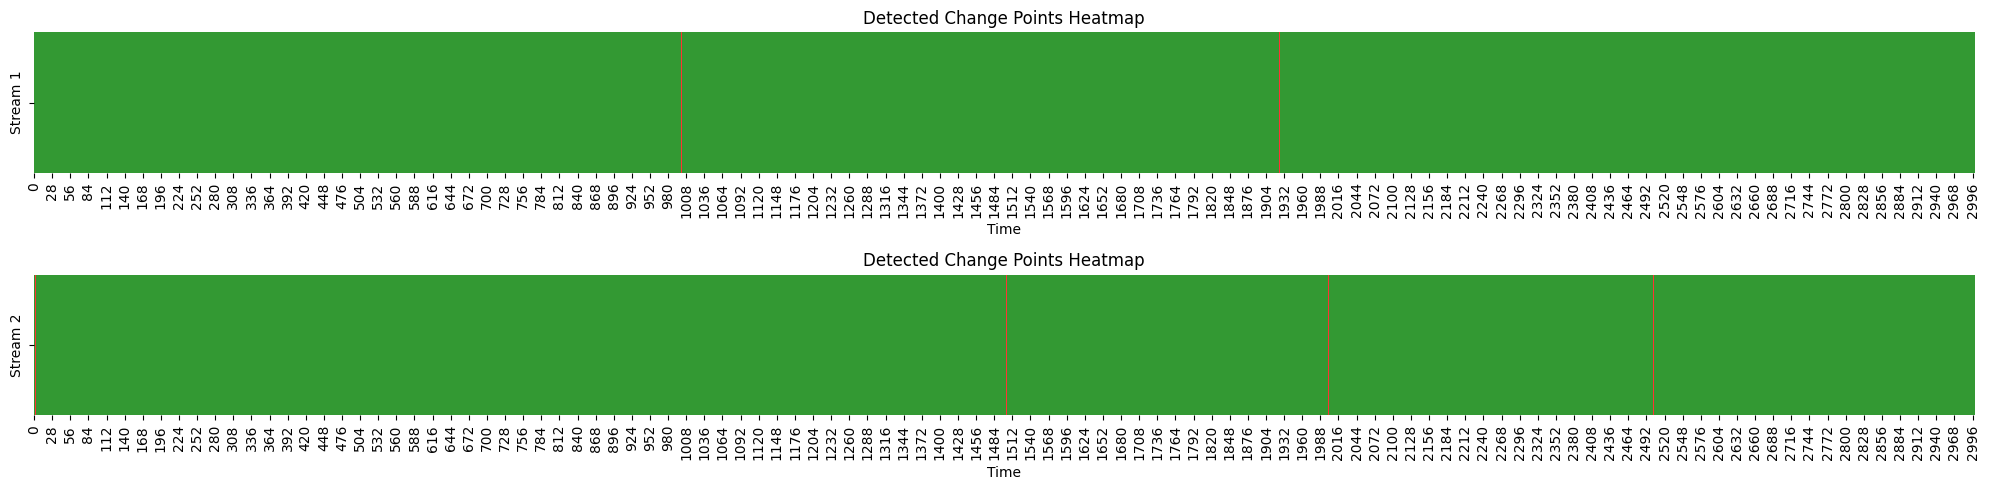

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap

list_drifts = [list_drifts1, list_drifts2]

axs = plt.subplots(2, 1, figsize=(20, 5))[1]
axs = axs.flatten()
for i, ax in enumerate(axs):
    sns.heatmap(np.array([list_drifts[i]]),
                cmap=ListedColormap(['green', 'red']),
                cbar=False,
                ax=ax,
                alpha=0.8)
    ax.set_xlabel('Time')
    ax.set_yticks([0.5], labels=[f'Stream {i+1}'])
    ax.set_title('Detected Change Points Heatmap')
plt.tight_layout()
plt.show()
